                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory us

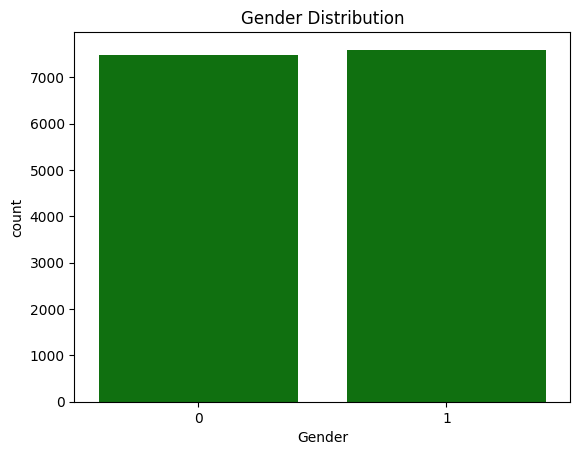

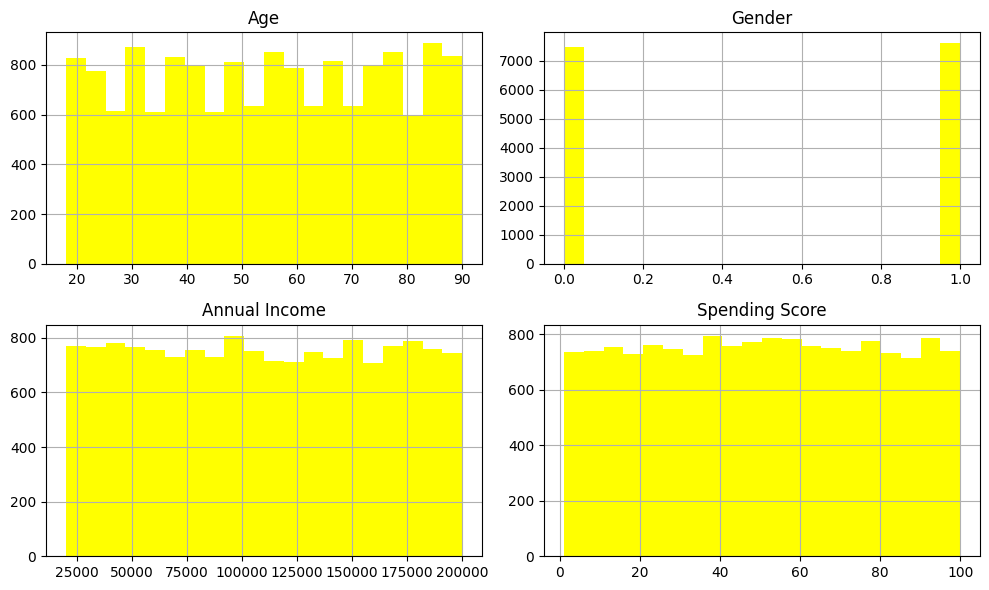

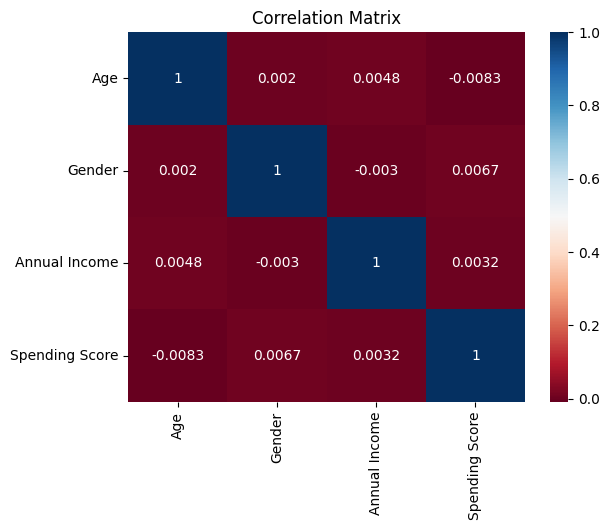

   Age  Gender  Annual Income  Spending Score  Age_scaled  Income_scaled  \
0   30       1         151479              89   -1.145516       0.798813   
1   58       0         185088              95    0.180335       1.442076   
2   62       0          70912              76    0.369742      -0.743208   
3   23       1          55460              57   -1.476979      -1.038953   
4   24       1         153752              76   -1.429627       0.842317   

   Score_scaled  
0      1.337059  
1      1.545929  
2      0.884507  
3      0.223086  
4      0.884507  


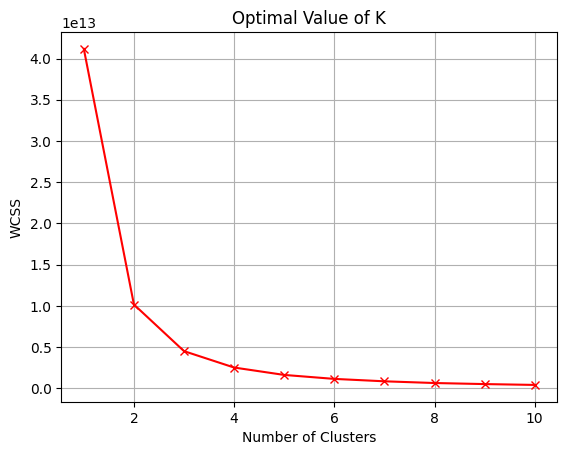

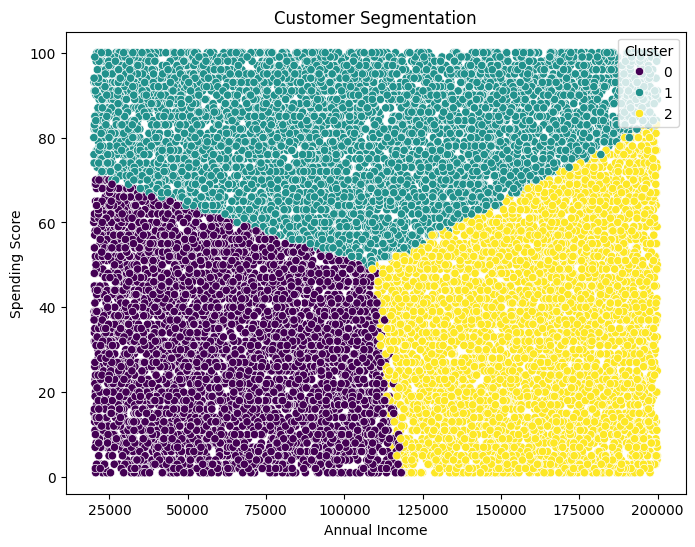

               Age  Annual Income  Spending Score
Cluster                                          
0        53.841614   63459.662208       30.425053
1        53.955623  104582.436939       80.818182
2        54.808245  161110.148449       35.339371
Cluster
1    5566
2    4803
0    4710
Name: count, dtype: int64


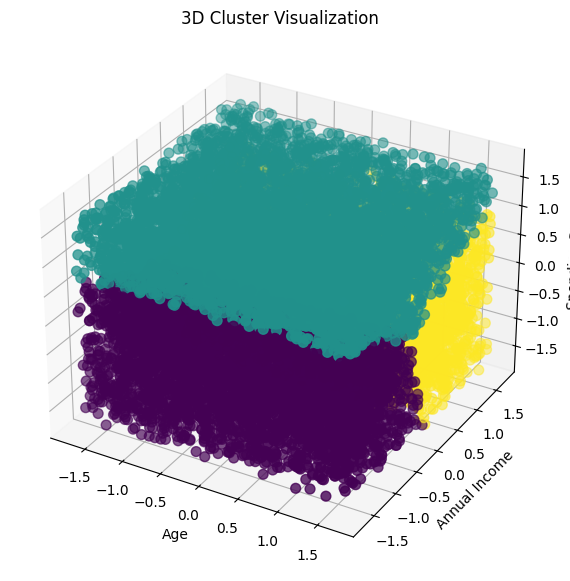

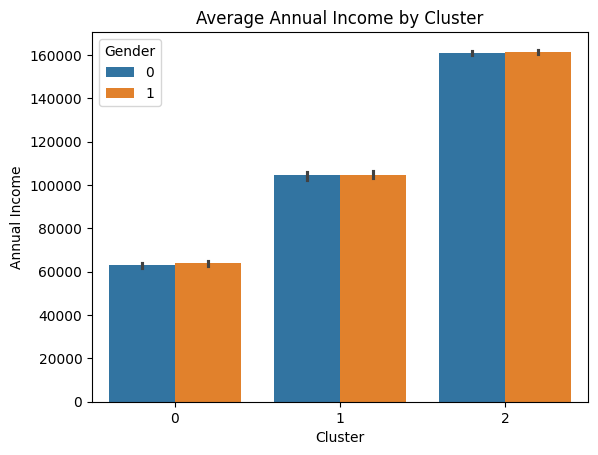

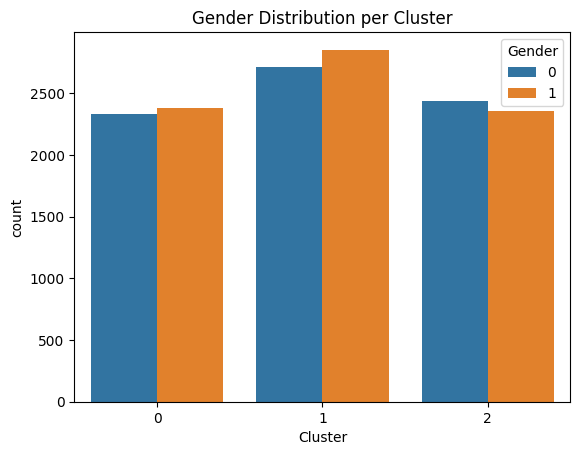

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

csv_path = 'C:/Users/hp/Downloads/Shopping Mall Customer Segmentation Data .csv'
df_raw = pd.read_csv(csv_path)  #get a dataset
print(df_raw.head())
print(df_raw.info())
print(df_raw.tail())
print(df_raw.sample())
print(df_raw.describe())
print(df_raw.dtypes)
df_raw.isnull().sum()
df_raw.drop_duplicates(inplace= True)
df_raw.drop('Customer ID' ,axis = 1, inplace = True)
df_raw['Gender'] = df_raw['Gender'].map({'Female': 0 , 'Male' :1})
print(df_raw.head())

#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

sns.countplot(x = 'Gender',data = df_raw , color = 'Green')
plt.title('Gender Distribution')
plt.show()

df_raw.hist(bins =20, figsize =(10,6) , color = 'Yellow')
plt.tight_layout()
plt.show()

sns.heatmap(df_raw.corr(), annot = True , cmap = 'RdBu')
plt.title('Correlation Matrix')
plt.show()

features_to_scale = df_raw[['Age', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=['Age_scaled', 'Income_scaled', 'Score_scaled'])

df_scaled = pd.concat([df_raw, scaled_df], axis=1)

print(df_scaled.head())

X = df_scaled[['Age_scaled' , 'Income_scaled', 'Score_scaled' ]]


#applying elbow method to determine optimal value of K
wcss = []                                                       #store wcss value for each K in the list
for i in range(1, 11):                                          # value of K from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='x', color ='red')
plt.title('Optimal Value of K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42)                 # K=3 is the valid choice or optimal value of K
df_scaled['Cluster'] = kmeans.fit_predict(X)


plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster', data=df_scaled, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

cluster_interpretation = df_scaled.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()
print(cluster_interpretation)
print(df_scaled['Cluster'].value_counts())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scaled['Age_scaled'], df_scaled['Income_scaled'], df_scaled['Score_scaled'], 
           c=df_scaled['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('3D Cluster Visualization')
plt.show()

sns.barplot(x='Cluster', y='Annual Income', hue ='Gender', data=df_scaled)
plt.title('Average Annual Income by Cluster')
plt.show()

sns.countplot(x='Cluster', hue='Gender', data=df_scaled)
plt.title('Gender Distribution per Cluster')
plt.show()
